In [1]:
## import libaries
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,5)

pd.options.mode.chained_assignment = None

In [2]:
#df = pd.read_csv('path_to_file/movies.csv')
movies_df = pd.read_csv(r"C:\Users\H\Downloads\movies.csv")
movies_df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
## to check the data information
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
movies_df.shape

(7668, 15)

### Observation
- There are 7668 total number of rows and 15 features

In [5]:
## To check for the data descriptions 
movies_df.describe().T

count          mean           std     min         25%         50%  \
year     7668.0  2.000405e+03  1.115351e+01  1980.0      1991.0      2000.0   
score    7665.0  6.390411e+00  9.688416e-01     1.9         5.8         6.5   
votes    7665.0  8.810850e+04  1.633238e+05     7.0      9100.0     33000.0   
budget   5497.0  3.558988e+07  4.145730e+07  3000.0  10000000.0  20500000.0   
gross    7479.0  7.850054e+07  1.657251e+08   309.0   4532055.5  20205757.0   
runtime  7664.0  1.072616e+02  1.858125e+01    55.0        95.0       104.0   

                75%           max  
year         2010.0  2.020000e+03  
score           7.1  9.300000e+00  
votes       93000.0  2.400000e+06  
budget   45000000.0  3.560000e+08  
gross    76016691.5  2.847246e+09  
runtime       116.0  3.660000e+02

### Observation :
- The years of movies considered in this dataset ranges from 1980 to 2020 and
-  Average runtime of 1hrs 7min





In [6]:
## check for null values
missing_values = movies_df.isna().sum()
missing_values

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
df = movies_df.dropna()

In [8]:
# check percentage of remaining dataset to the original data set
movies_df_total_rows = movies_df.shape[0]
df_total_rows =df.shape[0]

data_percentage = (df_total_rows/movies_df_total_rows)*100
data_percentage


70.6964006259781

### Observation
- For the purpose of this analysis missing values are dropped
- After dropping all the missing values there is 70.7% of the movies dataset left 

In [9]:
df.shape

(5421, 15)

In [10]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [11]:
## creating a new columns (profit and month)
df['profit'] = df['gross'] - df['budget']
df['month'] = df['released'].str.split(' ').str.get(0)


In [12]:
## check for correlations among features
df.corr(numeric_only=True)

year     score     votes    budget     gross   runtime    profit
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077  0.237456
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068  0.243340
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303  0.609203
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695  0.610530
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796  0.984428
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000  0.241554
profit   0.237456  0.243340  0.609203  0.610530  0.984428  0.241554  1.000000

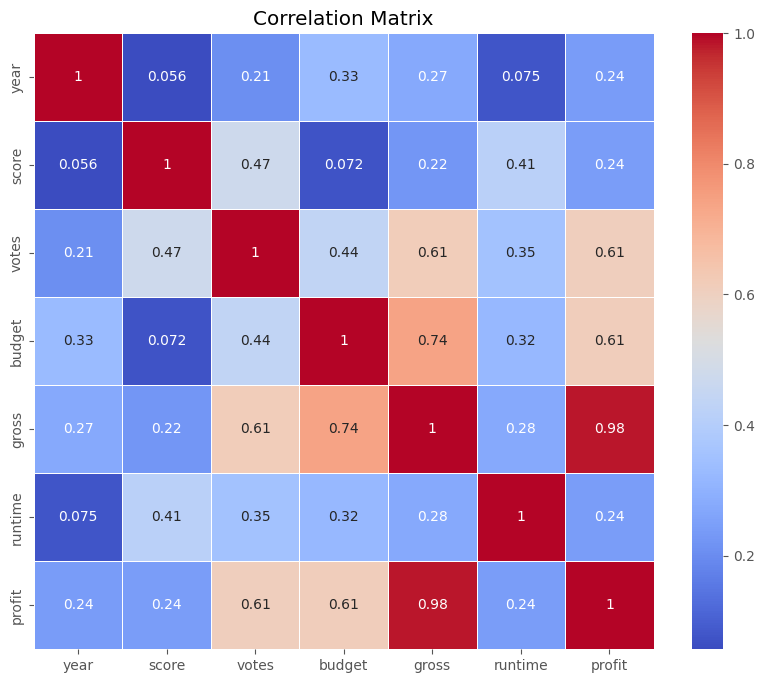

In [13]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Observation
- There is positive corelation between budget and profit
- There is positive corelation between gross and votes





In [14]:
# Genres distribution
df['genre'].value_counts()

genre
Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: count, dtype: int64

In [57]:
# 10 Top Countries 
top_countries = df['country'].value_counts(normalize=True)*100 
top_countries.head(10)

country
United States     79.671647
United Kingdom     9.075816
Canada             2.047593
France             1.936912
Germany            1.512636
Australia          0.774765
Japan              0.516510
China              0.479616
Hong Kong          0.442723
Ireland            0.387382
Name: proportion, dtype: float64

### Observation
- There is vast difference in Counts of United State compare to other countries
- Top 5 coommon genres are Comedy,Action, Drama ,Crime and Adventure      
ure 


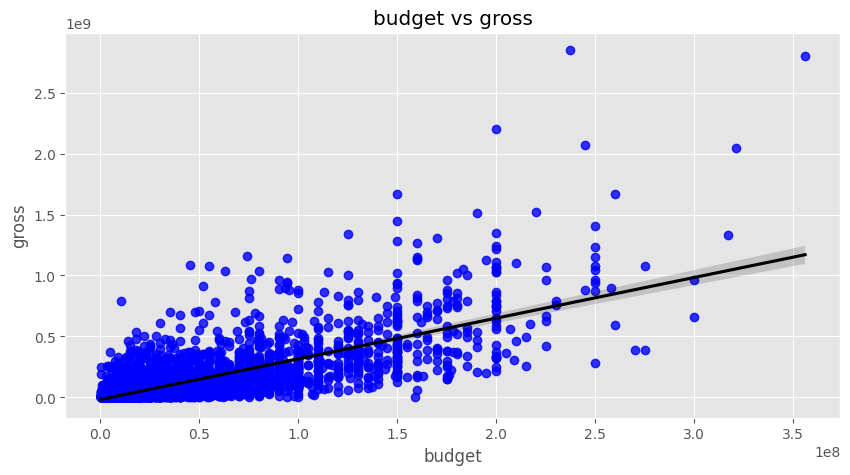

<Figure size 900x500 with 0 Axes>

In [16]:
sns.regplot(x=df['budget'],y=df['gross'],line_kws={'color':'black'},scatter_kws={'color':'blue'},marker='o')
plt.title('budget vs gross')
plt.figure(figsize=(9,5))

plt.show()


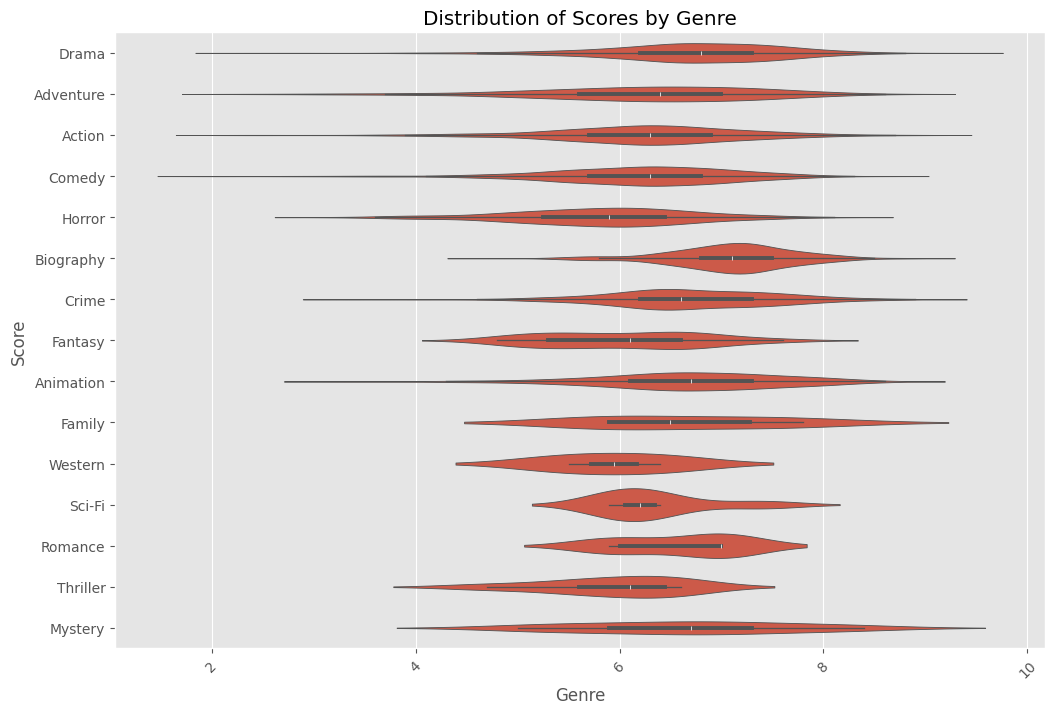

In [17]:
plt.figure(figsize=(12, 8))
sns.violinplot(y='genre', x='score', data=df)
plt.title('Distribution of Scores by Genre')
plt.xlabel('Genre')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


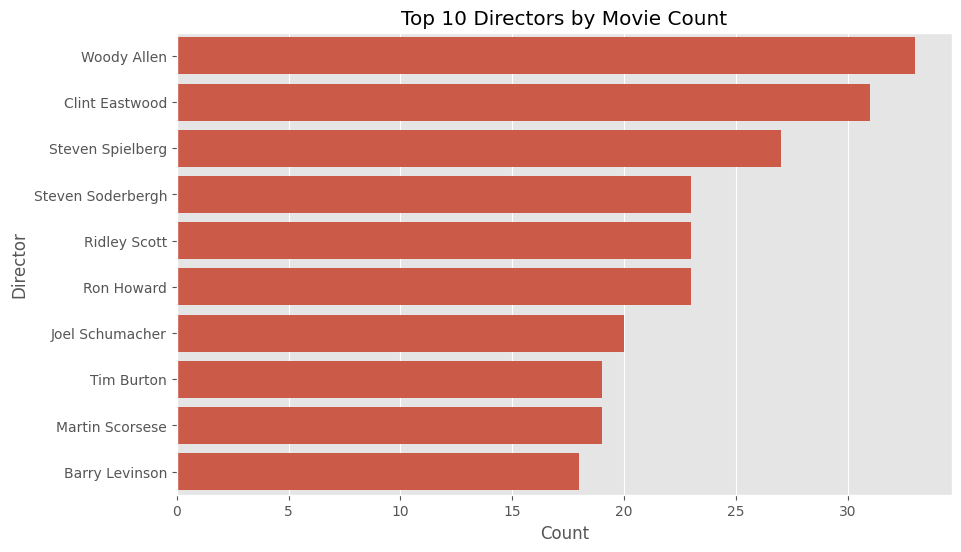

In [18]:
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors by Movie Count')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()


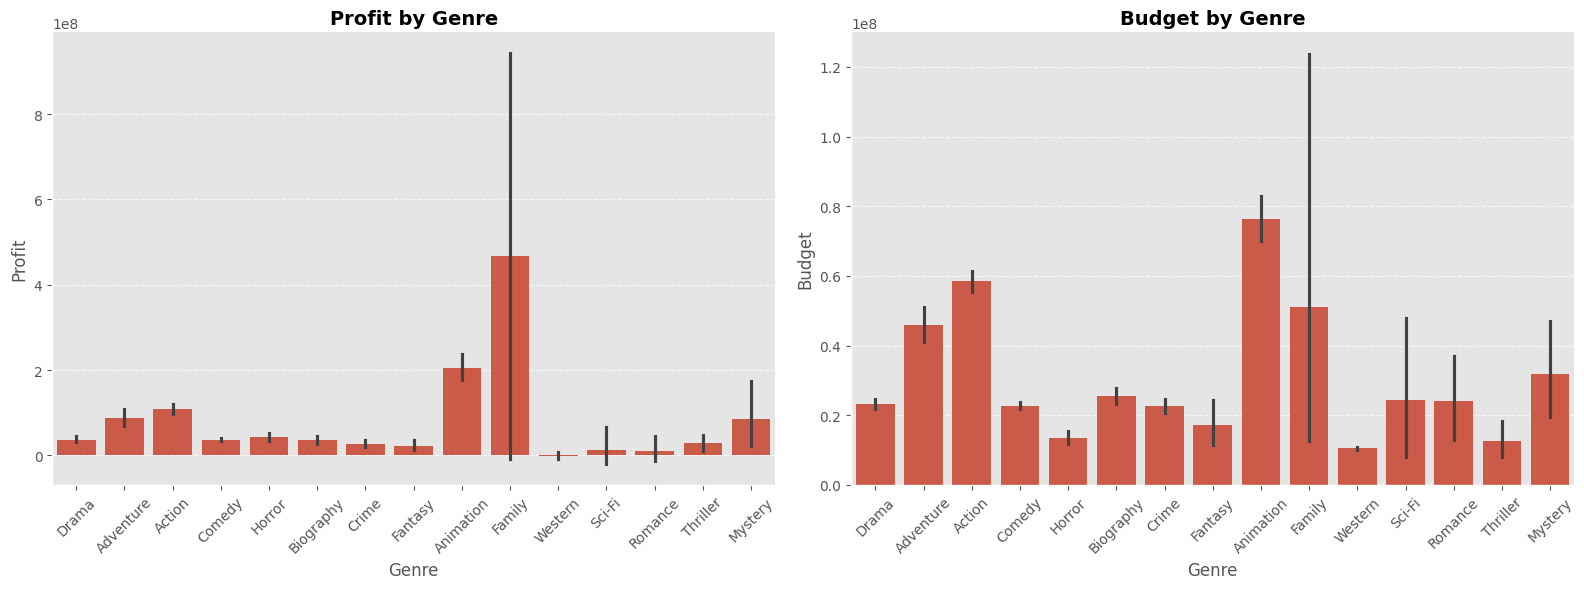

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create anythe figure and the subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First subplot: Profit by Genre
sns.barplot(x='genre', y='profit', data=df, ax=axes[0])
axes[0].set_title('Profit by Genre', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Genre', fontsize=12)
axes[0].set_ylabel('Profit', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
axes[0].grid(True, which='major', axis='y', linestyle='--', alpha=0.7)  # Add gridlines

# Second subplot: Budget by Genre
sns.barplot(x='genre', y='budget', data=df, ax=axes[1])
axes[1].set_title('Budget by Genre', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Genre', fontsize=12)
axes[1].set_ylabel('Budget', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
axes[1].grid(True, which='major', axis='y', linestyle='--', alpha=0.7)  # Add gridlines

# Remove top and right spines from both plots
sns.despine()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


In [20]:
def calculate_gain_or_profit(row):
    if row['gross'] > row['budget']:
        return 'gain' 
    else:
        return 'loss' 


In [21]:
# Apply the function to the DataFrame
df['gain_or_loss'] = df.apply(calculate_gain_or_profit, axis=1)
flop_movies=df[df['gain_or_loss']=='loss']
flop_movies

name     rating      genre  year  \
21                       Heaven's Gate          R  Adventure  1980   
33    Cattle Annie and Little Britches         PG      Drama  1980   
46                          The Island          R     Action  1980   
48                       The Nude Bomb         PG     Action  1980   
51                   Melvin and Howard          R     Comedy  1980   
...                                ...        ...        ...   ...   
7583            The Sun Is also a Star      PG-13      Drama  2019   
7588                              K-12  Not Rated    Fantasy  2019   
7604                            Mine 9  Not Rated      Drama  2019   
7616                   High on the Hog          R     Action  2019   
7651              The Call of the Wild         PG  Adventure  2020   

                                released  score    votes          director  \
21        April 24, 1981 (United States)    6.8  14000.0    Michael Cimino   
33        April 24, 1981 (United States)    6.1    604.0    Lamont Johnson   
46         June 13, 1980 (United States)    5.3   3900.0   Michael Ritchie   
48           May 9, 1980 (United States)    5.1   3100.0      Clive Donner   
51    September 19, 1980 (United States)    6.8   4500.0    Jonathan Demme   
...                                  ...    ...      ...               ...   
7583        May 17, 2019 (United States)    5.9   6600.0    Ry Russo-Young   
7588   September 5, 2019 (United States)    6.5   2500.0  Melanie Martinez   
7604               May 19, 2020 (Poland)    6.4   4400.0     Eddie Mensore   
7616      April 16, 2019 (United States)    3.5    195.0         Tony Wash   
7651   February 21, 2020 (United States)    6.8  42000.0     Chris Sanders   

                writer                star        country       budget  \
21      Michael Cimino  Kris Kristofferson  United States   44000000.0   
33          David Eyre         Scott Glenn  United States    5100000.0   
46      Peter Benchley       Michael Caine  United States   22000000.0   
48          Mel Brooks           Don Adams  United States   15000000.0   
51          Bo Goldman         Paul Le Mat  United States    7000000.0   
...                ...                 ...            ...          ...   
7583      Tracy Oliver        Yara Shahidi  United States    9000000.0   
7588  Melanie Martinez    Melanie Martinez  United States    5000000.0   
7604     Eddie Mensore       Terry Serpico  United States     350000.0   
7616        Andy Golub            Sid Haig  United States    1200000.0   
7651     Michael Green       Harrison Ford         Canada  135000000.0   

            gross                   company  runtime      profit      month  \
21      3484523.0      Partisan Productions    219.0 -40515477.0      April   
33       534816.0  Cattle Annie Productions     97.0  -4565184.0      April   
46     15716828.0        Universal Pictures    109.0  -6283172.0       June   
48     14662035.0        Universal Pictures     94.0   -337965.0        May   
51      4309490.0        Universal Pictures     95.0  -2690510.0  September   
...           ...                       ...      ...         ...        ...   
7583    6750029.0       Alloy Entertainment    100.0  -2249971.0        May   
7588     359377.0          Atlantic Records     96.0  -4640623.0  September   
7604     226421.0            Emphatic Films     83.0   -123579.0        May   
7616      45696.0    Hicktown Entertainment     85.0  -1154304.0      April   
7651  111105497.0      20th Century Studios    100.0 -23894503.0   February   

     gain_or_loss  
21           loss  
33           loss  
46           loss  
48           loss  
51           loss  
...           ...  
7583         loss  
7588         loss  
7604         loss  
7616         loss  
7651         loss  

[1744 rows x 18 columns]

In [22]:
df['gain_or_loss'].value_counts(normalize=True)

gain_or_loss
gain    0.678288
loss    0.321712
Name: proportion, dtype: float64

<Figure size 1500x1000 with 0 Axes>

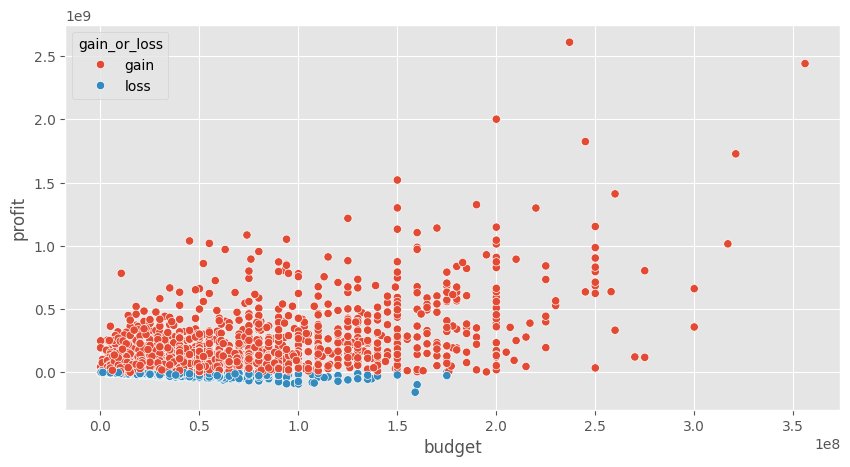

<Figure size 1500x1000 with 0 Axes>

In [23]:
sns.scatterplot(x='budget',y='profit',data=df,hue='gain_or_loss')
plt.figure(figsize=(15, 10))

In [24]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'profit', 'month', 'gain_or_loss'],
      dtype='object')

In [25]:
sorted_loss_counts=flop_movies['year'].value_counts().reset_index().sort_values('year')
sorted_loss_counts.head(5)

year  count
39  1980      8
36  1981     21
35  1982     22
34  1983     28
30  1984     30

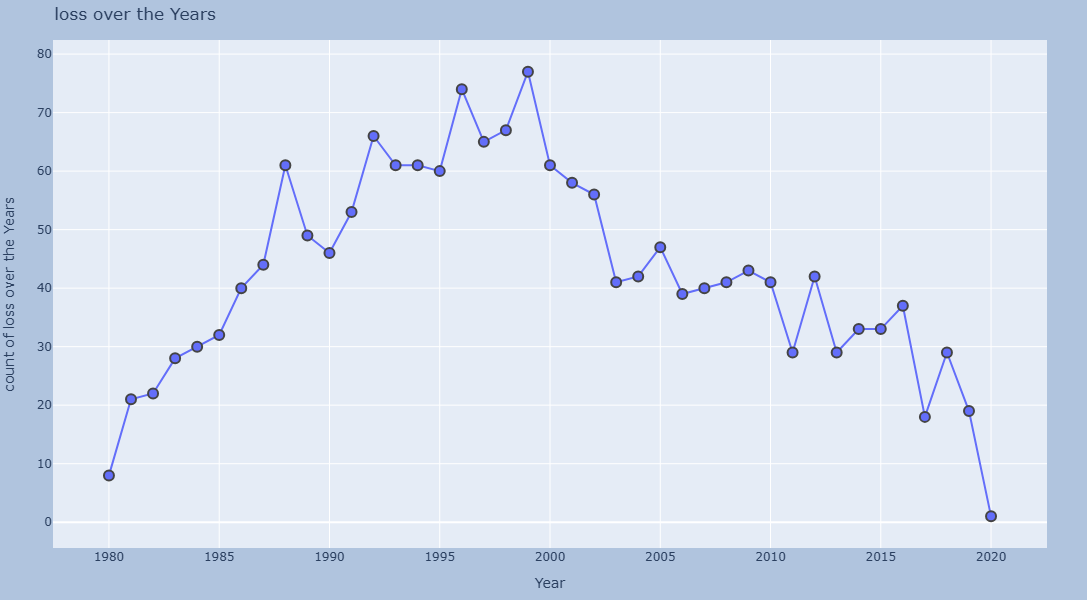

In [26]:
import plotly.express as px
fig = px.line(sorted_loss_counts, x='year', y='count', title='loss over the Years')
fig.update_layout(width=800, height=600,xaxis_title='Year', yaxis_title='count of loss over the Years')
fig.update_layout(
    margin=dict(l=40, r=40, t=40, b=40),
    paper_bgcolor="LightSteelBlue")
fig.update_traces(mode='lines+markers', marker_line_width=2, marker_size=10)
fig.show()


### Observations:
- There is fluntuations across the year 
- But 1999 has the higest number of floped movies with 77 counts
- The 2020 has the lowest with 1 movie

In [27]:
sorted_gain_counts=df[df['gain_or_loss']=='gain']['year'].value_counts().reset_index().sort_values('year')

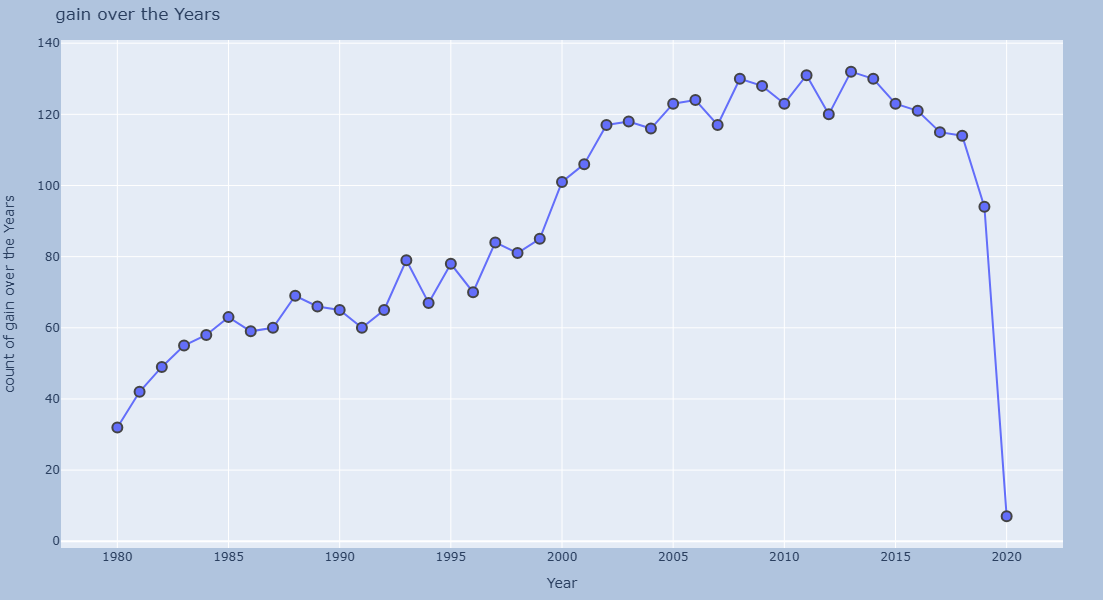

In [28]:
import plotly.express as px
sorted_loss_counts=df[df['gain_or_loss']=='gain']['year'].value_counts().reset_index().sort_values('year')
sorted_loss_counts
fig = px.line(sorted_gain_counts, x='year', y='count', title='gain over the Years')
fig.update_layout(width=800, height=600,xaxis_title='Year', yaxis_title='count of gain over the Years')
fig.update_layout(
    margin=dict(l=40, r=40, t=40, b=40),
    paper_bgcolor="LightSteelBlue")
fig.update_traces(mode='lines+markers', marker_line_width=2, marker_size=10)
fig.show()

### Observations:
- There is general upward movements in number of profited movies
- There is a sharp decrease in year 2020 with just 7 movies

In [29]:
!pip install wordcloud


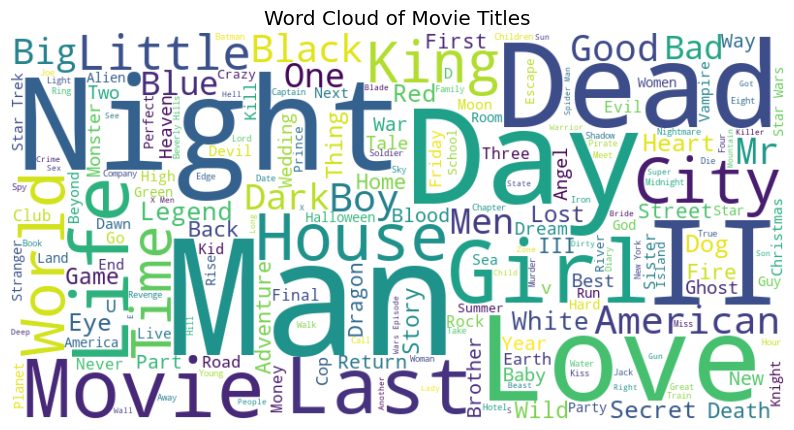

In [30]:
from wordcloud import WordCloud

text =' '.join(df['name'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()



# yearly observations

In [31]:
highest_profited = df.sort_values('profit',ascending=False).head(10)
highest_scored = df.sort_values('score',ascending=False).head(10)
highest_voted = df.sort_values('votes',ascending=False).head(10)
highest_budgeted = df.sort_values('budget',ascending=False).head(10)

In [32]:
yearly_most_budgeted= df.groupby('year').apply(lambda x: x.loc[x['budget'].idxmax()])


In [33]:
yearly_most_budgeted[yearly_most_budgeted['gain_or_loss']=='loss']

name rating      genre  year  \
year                                                   
1981                  Inchon     PG      Drama  1981   
1983                   Krull     PG     Action  1983   
1984         The Cotton Club      R      Crime  1984   
1985  Santa Claus: The Movie     PG  Adventure  1985   
1986                 Pirates  PG-13     Action  1986   
1987                  Ishtar  PG-13     Action  1987   

                                released  score    votes  \
year                                                       
1981  September 17, 1982 (United States)    2.7    659.0   
1983       July 29, 1983 (United States)    6.1  31000.0   
1984   December 14, 1984 (United States)    6.5  17000.0   
1985   November 27, 1985 (United States)    6.3  12000.0   
1986       July 18, 1986 (United States)    6.1   8100.0   
1987        May 15, 1987 (United States)    4.5  11000.0   

                  director            writer              star  \
year                                                             
1981         Terence Young       Robin Moore  Laurence Olivier   
1983           Peter Yates  Stanford Sherman      Ken Marshall   
1984  Francis Ford Coppola   William Kennedy      Richard Gere   
1985        Jeannot Szwarc      David Newman      Dudley Moore   
1986        Roman Polanski    John Brownjohn    Walter Matthau   
1987            Elaine May        Elaine May     Warren Beatty   

             country      budget       gross                  company  \
year                                                                    
1981     South Korea  46000000.0   5200986.0      One Way Productions   
1983  United Kingdom  47000000.0  16916617.0        Columbia Pictures   
1984   United States  58000000.0  25928721.0         Zoetrope Studios   
1985  United Kingdom  50000000.0  23717291.0                      GGG   
1986          France  40000000.0   1641825.0  Carthago Films S.a.r.l.   
1987   United States  55000000.0  14375181.0        Columbia Pictures   

      runtime      profit      month gain_or_loss  
year                                               
1981    140.0 -40799014.0  September         loss  
1983    121.0 -30083383.0       July         loss  
1984    127.0 -32071279.0   December         loss  
1985    107.0 -26282709.0   November         loss  
1986    121.0 -38358175.0       July         loss  
1987    107.0 -40624819.0        May         loss

## Observation:
- There are most budgeted movies in year(1981,1983,1984,1985,1986,1987) consecutively that flopped

In [34]:
yearly_most_profited = df.groupby('year').apply(lambda x: x.loc[x['profit'].idxmax()])
yearly_most_profited 

name     rating      genre  \
year                                                                         
1980  Star Wars: Episode V - The Empire Strikes Back         PG     Action   
1981   Indiana Jones and the Raiders of the Lost Ark         PG     Action   
1982                      E.T. the Extra-Terrestrial         PG     Family   
1983      Star Wars: Episode VI - Return of the Jedi         PG     Action   
1984            Indiana Jones and the Temple of Doom         PG     Action   
1985                              Back to the Future         PG  Adventure   
1986                                         Top Gun         PG     Action   
1987                                Fatal Attraction          R      Drama   
1988                                        Rain Man          R      Drama   
1989              Indiana Jones and the Last Crusade      PG-13     Action   
1990                                           Ghost      PG-13      Drama   
1991                      Terminator 2: Judgment Day          R     Action   
1992                                         Aladdin          G  Animation   
1993                                   Jurassic Park      PG-13     Action   
1994                                   The Lion King          G  Animation   
1995                                       Toy Story          G  Animation   
1996                                Independence Day      PG-13     Action   
1997                                         Titanic      PG-13      Drama   
1998                                      Armageddon      PG-13     Action   
1999       Star Wars: Episode I - The Phantom Menace         PG     Action   
2000                          Mission: Impossible II      PG-13     Action   
2001           Harry Potter and the Sorcerer's Stone         PG  Adventure   
2002           The Lord of the Rings: The Two Towers      PG-13     Action   
2003   The Lord of the Rings: The Return of the King      PG-13     Action   
2004                                         Shrek 2         PG  Animation   
2005    Star Wars: Episode III - Revenge of the Sith      PG-13     Action   
2006      Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
2007       Harry Potter and the Order of the Phoenix      PG-13     Action   
2008                                 The Dark Knight      PG-13     Action   
2009                                          Avatar      PG-13     Action   
2010                                     Toy Story 3          G  Animation   
2011    Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
2012                                    The Avengers      PG-13     Action   
2013                                          Frozen         PG  Animation   
2014                 Transformers: Age of Extinction      PG-13     Action   
2015      Star Wars: Episode VII - The Force Awakens      PG-13     Action   
2016                      Captain America: Civil War      PG-13     Action   
2017                            Beauty and the Beast         PG     Family   
2018                          Avengers: Infinity War      PG-13     Action   
2019                               Avengers: Endgame      PG-13     Action   
2020                               The Eight Hundred  Not Rated     Action   

      year                            released  score      votes  \
year                                                               
1980  1980       June 20, 1980 (United States)    8.7  1200000.0   
1981  1981       June 12, 1981 (United States)    8.4   905000.0   
1982  1982       June 11, 1982 (United States)    7.8   381000.0   
1983  1983        May 25, 1983 (United States)    8.3   973000.0   
1984  1984        May 23, 1984 (United States)    7.5   459000.0   
1985  1985        July 3, 1985 (United States)    8.5  1100000.0   
1986  1986        May 16, 1986 (United States)    6.9   306000.0   
1987  1987  September 18, 1987 (United States)    6.9    79000.0   
1988  1988   

In [35]:
yearly_most_voted = df.groupby('year').apply(lambda x: x.loc[x['votes'].idxmax()])
yearly_most_voted

name rating      genre  \
year                                                                        
1980     Star Wars: Episode V - The Empire Strikes Back     PG     Action   
1981      Indiana Jones and the Raiders of the Lost Ark     PG     Action   
1982                                       Blade Runner      R     Action   
1983         Star Wars: Episode VI - Return of the Jedi     PG     Action   
1984                                     The Terminator      R     Action   
1985                                 Back to the Future     PG  Adventure   
1986                                             Aliens      R     Action   
1987                                  Full Metal Jacket      R      Drama   
1988                                           Die Hard      R     Action   
1989                 Indiana Jones and the Last Crusade  PG-13     Action   
1990                                         Goodfellas      R  Biography   
1991                           The Silence of the Lambs      R      Crime   
1992                                     Reservoir Dogs      R      Crime   
1993                                   Schindler's List      R  Biography   
1994                           The Shawshank Redemption      R      Drama   
1995                                              Se7en      R      Crime   
1996                                              Fargo      R      Crime   
1997                                            Titanic  PG-13      Drama   
1998                                Saving Private Ryan      R      Drama   
1999                                         Fight Club      R      Drama   
2000                                          Gladiator      R     Action   
2001  The Lord of the Rings: The Fellowship of the Ring  PG-13     Action   
2002              The Lord of the Rings: The Two Towers  PG-13     Action   
2003      The Lord of the Rings: The Return of the King  PG-13     Action   
2004              Eternal Sunshine of the Spotless Mind      R      Drama   
2005                                      Batman Begins  PG-13     Action   
2006                                       The Departed      R      Crime   
2007                             No Country for Old Men      R      Crime   
2008                                    The Dark Knight  PG-13     Action   
2009                               Inglourious Basterds      R  Adventure   
2010                                          Inception  PG-13     Action   
2011       Harry Potter and the Deathly Hallows: Part 2  PG-13  Adventure   
2012                              The Dark Knight Rises  PG-13     Action   
2013                            The Wolf of Wall Street      R  Biography   
2014                                       Interstellar  PG-13  Adventure   
2015                                 Mad Max: Fury Road      R     Action   
2016                                           Deadpool      R     Action   
2017                                              Logan      R     Action   
2018                             Avengers: Infinity War  PG-13     Action   
2019                                              Joker      R      Crime   
2020                                              Tenet  PG-13     Action   

      year                            released  score      votes  \
year                                                               
1980  1980       June 20, 1980 (United States)    8.7  1200000.0   
1981  1981       June 12, 1981 (United States)    8.4   905000.0   
1982  1982       June 25, 1982 (United States)    8.1   710000.0   
1983  1983        May 25, 1983 (United States)    8.3   973000.0   
1984  1984    October 26, 1984 (United States)    8.0   812000.0   
1985  1985        July 3, 1985 (United States)    8.5  1100000.0   
1986  1986       July 18, 1986 (United States)    8.3   668000.0   
1987  1987       July 10, 1987 (United States)    8.3   691000.0   
1988  1988       July 20, 1988 (United States)    8.2   810

In [36]:
yearly_most_scored= df.groupby('year').apply(lambda x: x.loc[x['score'].idxmax()])
yearly_most_scored

name rating      genre  \
year                                                                        
1980     Star Wars: Episode V - The Empire Strikes Back     PG     Action   
1981      Indiana Jones and the Raiders of the Lost Ark     PG     Action   
1982                                       Blade Runner      R     Action   
1983                                           Scarface      R      Crime   
1984                        Once Upon a Time in America      R      Crime   
1985                                 Back to the Future     PG  Adventure   
1986                                             Aliens      R     Action   
1987                                  Full Metal Jacket      R      Drama   
1988                                    Cinema Paradiso     PG      Drama   
1989                 Indiana Jones and the Last Crusade  PG-13     Action   
1990                                         Goodfellas      R  Biography   
1991                           The Silence of the Lambs      R      Crime   
1992                                     Reservoir Dogs      R      Crime   
1993                                   Schindler's List      R  Biography   
1994                           The Shawshank Redemption      R      Drama   
1995                                              Se7en      R      Crime   
1996                                              Fargo      R      Crime   
1997                                  Life Is Beautiful  PG-13     Comedy   
1998                                Saving Private Ryan      R      Drama   
1999                                         Fight Club      R      Drama   
2000                                          Gladiator      R     Action   
2001  The Lord of the Rings: The Fellowship of the Ring  PG-13     Action   
2002              The Lord of the Rings: The Two Towers  PG-13     Action   
2003      The Lord of the Rings: The Return of the King  PG-13     Action   
2004              Eternal Sunshine of the Spotless Mind      R      Drama   
2005                                      Batman Begins  PG-13     Action   
2006                                       The Departed      R      Crime   
2007                                There Will Be Blood      R      Drama   
2008                                    The Dark Knight  PG-13     Action   
2009                               Inglourious Basterds      R  Adventure   
2010                                          Inception  PG-13     Action   
2011                                       A Separation  PG-13      Drama   
2012                                   Django Unchained      R      Drama   
2013                            The Wolf of Wall Street      R  Biography   
2014                                       Interstellar  PG-13  Adventure   
2015                                 Mad Max: Fury Road      R     Action   
2016                                      Hacksaw Ridge      R  Biography   
2017                                               Coco     PG  Animation   
2018                             Avengers: Infinity War  PG-13     Action   
2019                                           Parasite      R     Comedy   
2020                                              Tenet  PG-13     Action   

      year                            released  score      votes  \
year                                                               
1980  1980       June 20, 1980 (United States)    8.7  1200000.0   
1981  1981       June 12, 1981 (United States)    8.4   905000.0   
1982  1982       June 25, 1982 (United States)    8.1   710000.0   
1983  1983    December 9, 1983 (United States)    8.3   766000.0   
1984  1984        June 1, 1984 (United States)    8.4   321000.0   
1985  1985        July 3, 1985 (United States)    8.5  1100000.0   
1986  1986       July 18, 1986 (United States)    8.3   668000.0   
1987  1987       July 10, 1987 (United States)    8.3   691000.0   
1988  1988   February 23, 1990 (United States)    8.5   239

In [37]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'profit', 'month', 'gain_or_loss'],
      dtype='object')

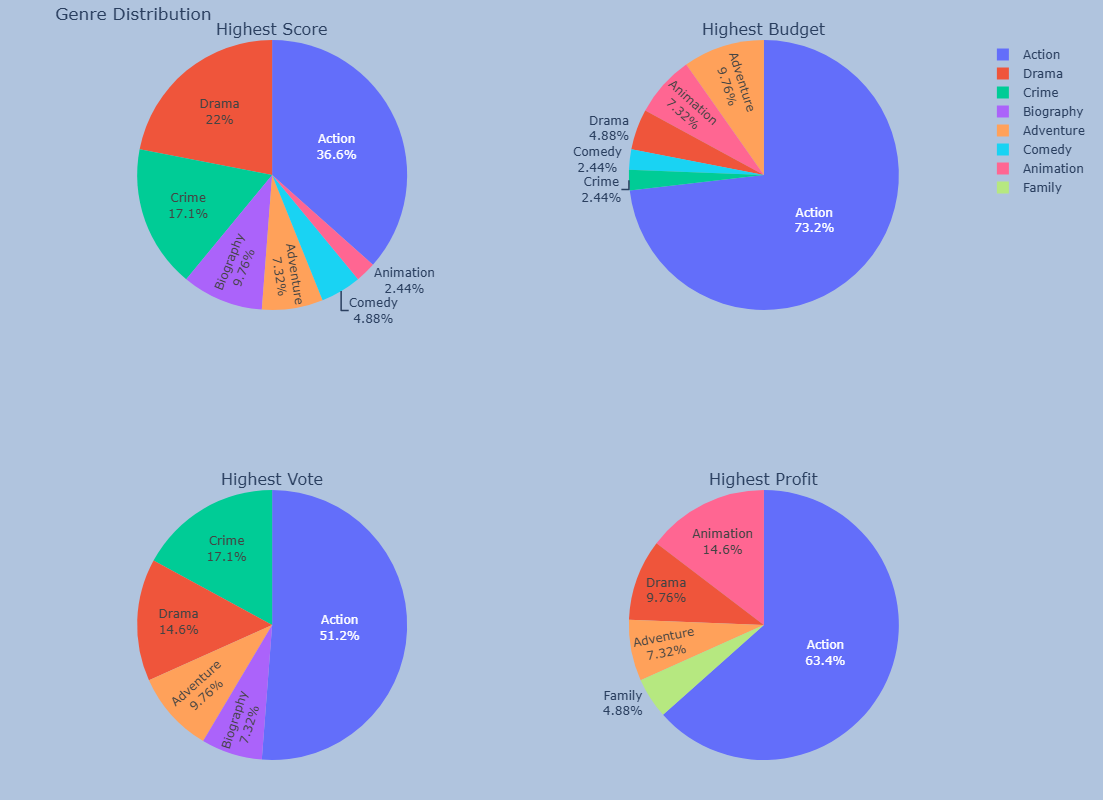

In [38]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
def create_pie_chart_data(subset, title):
    genre_counts = subset['genre'].value_counts()
    fig = go.Figure(data=[go.Pie(labels=genre_counts.index, values=genre_counts.values, textinfo='percent+label')])
    fig.update_layout(title_text=title)
    return fig



fig1 = create_pie_chart_data(yearly_most_scored, "Genre Distribution of Highest Score")
fig2 = create_pie_chart_data(yearly_most_budgeted, "Genre Distribution of Highest Budget")
fig3 = create_pie_chart_data(yearly_most_voted, "Genre Distribution of Highest Vote ")
fig4 = create_pie_chart_data(yearly_most_profited, "Genre Distribution of Highest Profit ")


fig = make_subplots(rows=2, cols=2, subplot_titles=["Highest Score", "Highest Budget", "Highest Vote", "Highest Profit"],specs=[[{"type": "pie"}, {"type": "pie"}],
           [{"type": "pie"}, {"type": "pie"}]],
)
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=2, col=1)
fig.add_trace(fig4.data[0], row=2, col=2)

fig.update_layout(width=1000, height=800,title="Genre Distribution", showlegend=True)
fig.update_layout(
    margin=dict(l=40, r=40, t=40, b=40),
    paper_bgcolor="LightSteelBlue")
fig.show()


## Observation:
- Action movies appear to be high at all categories,its more bugeted and generated more profit compare to other genres
  


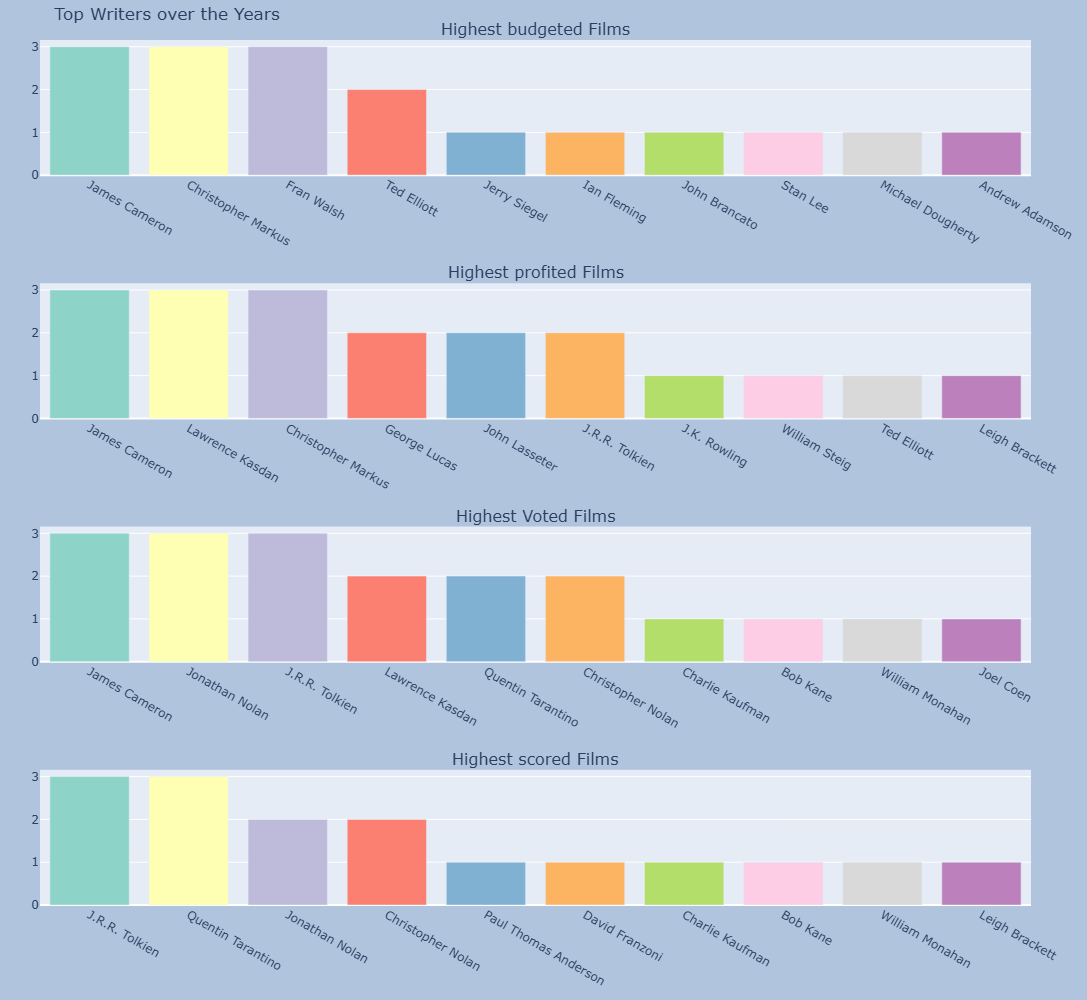

In [52]:
def create_bar_plot_data(subset, column_name):
    top_counts = subset[column_name].value_counts().nlargest(10)
    colors = px.colors.qualitative.Set3
    color_mapping = dict(zip(top_counts.index, colors))
    fig = go.Figure(data=[go.Bar(x=top_counts.index, y=top_counts.values)])
    fig.update_layout(xaxis_title=column_name, yaxis_title='Count')
    top_counts_color = top_counts.index.map(color_mapping)
    fig = px.bar(top_counts, x=top_counts.index, y=top_counts.values)
    fig.update_traces(marker=dict(color=top_counts_color))
    return fig


fig1 = create_bar_plot_data(yearly_most_budgeted, 'writer')
fig2 = create_bar_plot_data(yearly_most_profited, 'writer')
fig3 = create_bar_plot_data(yearly_most_voted, 'writer')
fig4 = create_bar_plot_data(yearly_most_scored, 'writer')


fig = make_subplots(rows=4, cols=1, subplot_titles=["Highest budgeted Films", "Highest profited Films", "Highest Voted Films", "Highest scored Films"])
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=2, col=1)
fig.add_trace(fig3.data[0], row=3, col=1)
fig.add_trace(fig4.data[0], row=4, col=1)


fig.update_layout(width=800,
                height=1000, 
                title="Top Writers over the Years", 
                showlegend=False)


fig.update_layout(
    margin=dict(l=40, r=40, t=40, b=40),
    paper_bgcolor="LightSteelBlue")

fig.show()

## Observations
- James Cameron appears top writer as highest_budgeted ,highest_profited,highest_voted,highest_scored with 3 counts in each categories
- J.R.R.Tolkien  as top writer as highest_scored with 3 counts, appears in highest_profited with 2 counts and highest voted with 3 counts


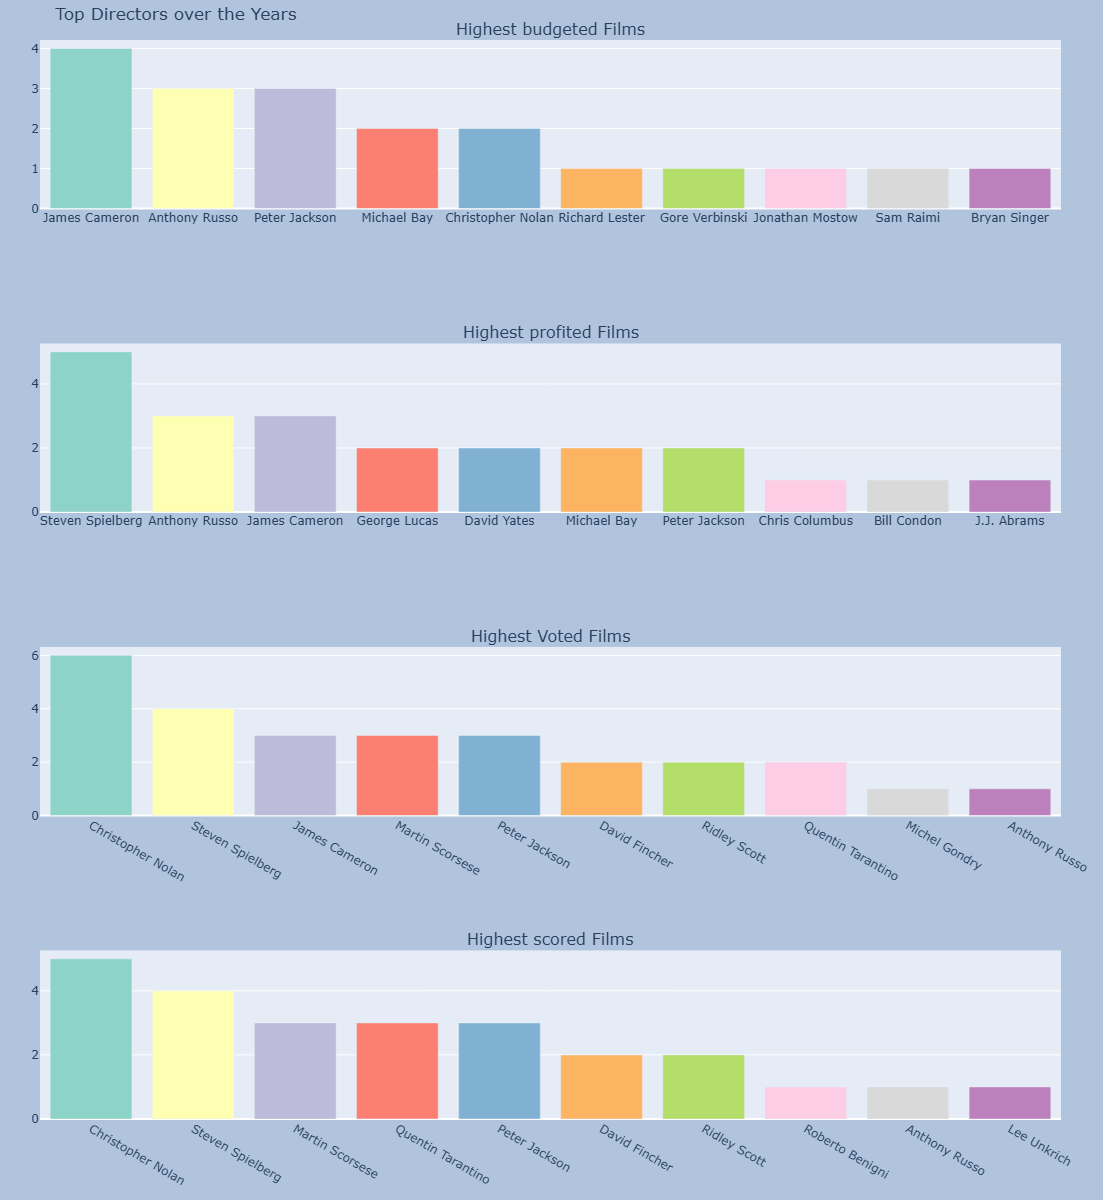

In [46]:
def create_bar_plot_data(subset, column_name):
    top_counts = subset[column_name].value_counts().nlargest(10)
    colors = px.colors.qualitative.Set3
    color_mapping = dict(zip(top_counts.index, colors))
    fig = go.Figure(data=[go.Bar(x=top_counts.index, y=top_counts.values)])
    fig.update_layout(xaxis_title=column_name, yaxis_title='Count')
    top_counts_color = top_counts.index.map(color_mapping)
    fig = px.bar(top_counts, x=top_counts.index, y=top_counts.values)
    fig.update_traces(marker=dict(color=top_counts_color))
    return fig


fig1 = create_bar_plot_data(yearly_most_budgeted, 'director')
fig2 = create_bar_plot_data(yearly_most_profited, 'director')
fig3 = create_bar_plot_data(yearly_most_voted, 'director')
fig4 = create_bar_plot_data(yearly_most_scored, 'director')


fig = make_subplots(rows=4, cols=1, subplot_titles=["Highest budgeted Films", "Highest profited Films", "Highest Voted Films", "Highest scored Films"])
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=2, col=1)
fig.add_trace(fig3.data[0], row=3, col=1)
fig.add_trace(fig4.data[0], row=4, col=1)


fig.update_layout(width=800,
                height=1200, 
                title="Top Directors over the Years", 
                showlegend=False)


fig.update_layout(
    margin=dict(l=40, r=40, t=40, b=40),
    paper_bgcolor="LightSteelBlue")

fig.show()

## Observation:
- Christopher Nolan appears in 3 different categories as highest_voted with 6 counts ,highest_scored with 5 counts and highest_budgeted with 2 counts
- Steven Spielberg appears in highest profited movies with 5 counts, highest_voted with 4 counts and highest_scored with 4counts
- James Cameron appears in highest_budgeted with 4 counts , highest_profited with 3 counts and highest_voted with 3 counts
- Anthony Russo appears in all the 4 categories,highest_budgeted ,highest_profited,highest_voted with 3 counts each and highest_scored with 1 counts


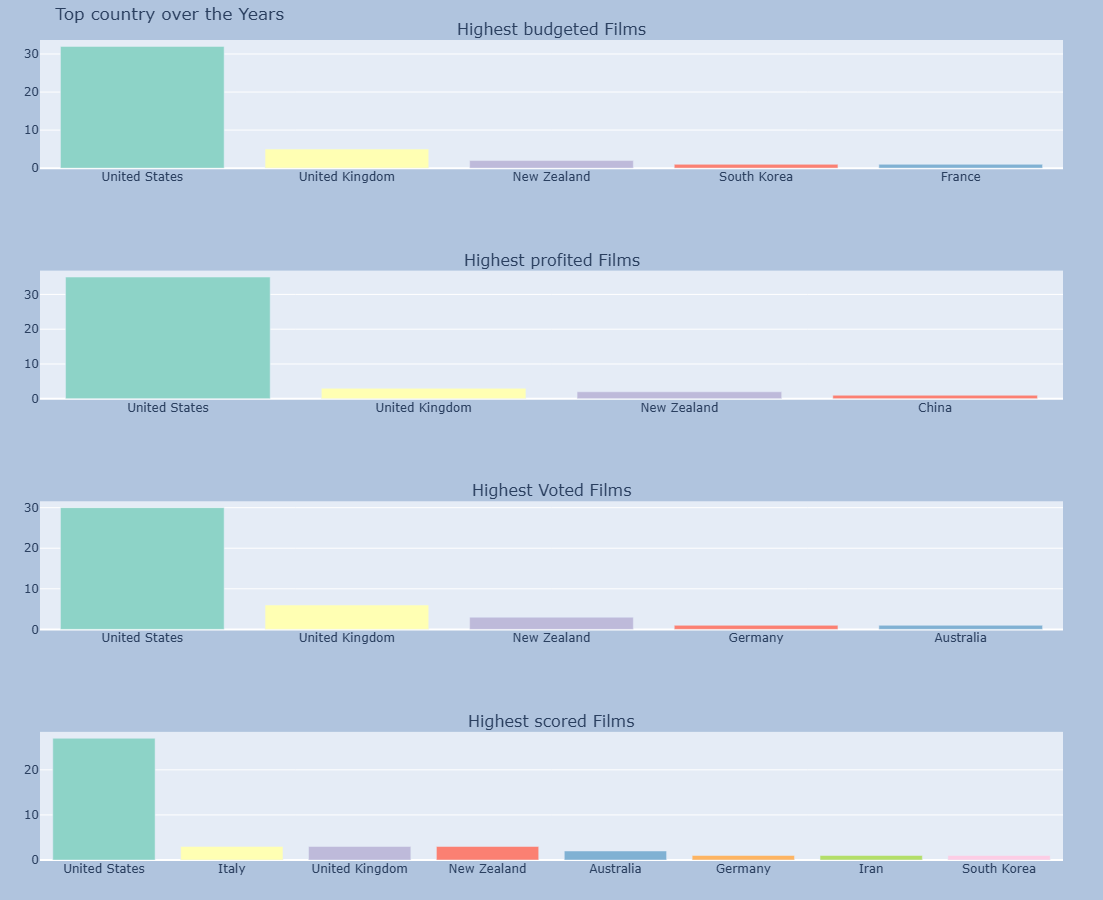

In [53]:
fig1 = create_bar_plot_data(yearly_most_budgeted, 'country')
fig2 = create_bar_plot_data(yearly_most_profited, 'country')
fig3 = create_bar_plot_data(yearly_most_voted, 'country')
fig4 = create_bar_plot_data(yearly_most_scored, 'country')


fig = make_subplots(rows=4, cols=1, subplot_titles=["Highest budgeted Films", "Highest profited Films", "Highest Voted Films", "Highest scored Films"])
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=2, col=1)
fig.add_trace(fig3.data[0], row=3, col=1)
fig.add_trace(fig4.data[0], row=4, col=1)


fig.update_layout(width=800, 
                height=900, 
                title="Top country over the Years", 
                showlegend=False)


fig.update_layout(
    margin=dict(l=40, r=40, t=40, b=40),
    paper_bgcolor="LightSteelBlue")

fig.show()

## Observation:
- United states appears as top country in the 4 categories with significant difference from others (highest_budgeted with 32 counts,highest_profited with 35 counts ,highest_voted with 30 counts,highest_scored with 27 counts )
  

## Profit over the years

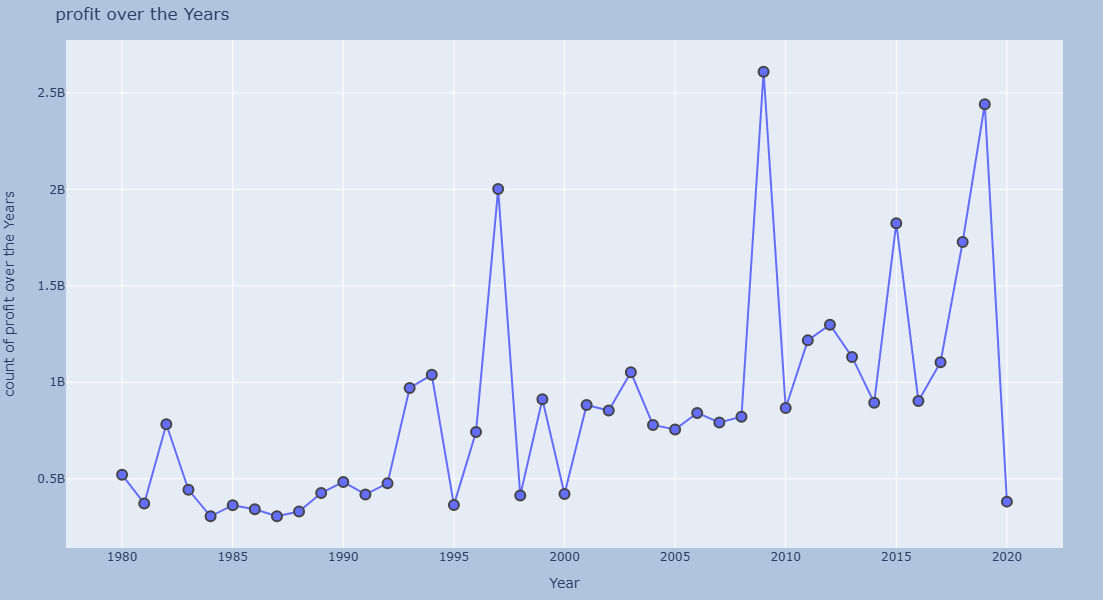

In [50]:
import plotly.express as px
fig = px.line(yearly_most_profited, x='year', y='profit', title='profit over the Years')
fig.update_layout(width=800, height=600,xaxis_title='Year', yaxis_title='count of profit over the Years')
fig.update_layout(
    margin=dict(l=40, r=40, t=40, b=40),
    paper_bgcolor="LightSteelBlue")
fig.update_traces(mode='lines+markers', marker_line_width=2, marker_size=10)
fig.show()


## Observations:
-  Year 1997,2009,2019 generated very high profit compare to other years with[2.001647,2.610246 2.441501 ]billions respectively
-  There is a very sharp drop in profit in year 2020 with 381.4216 millions generated

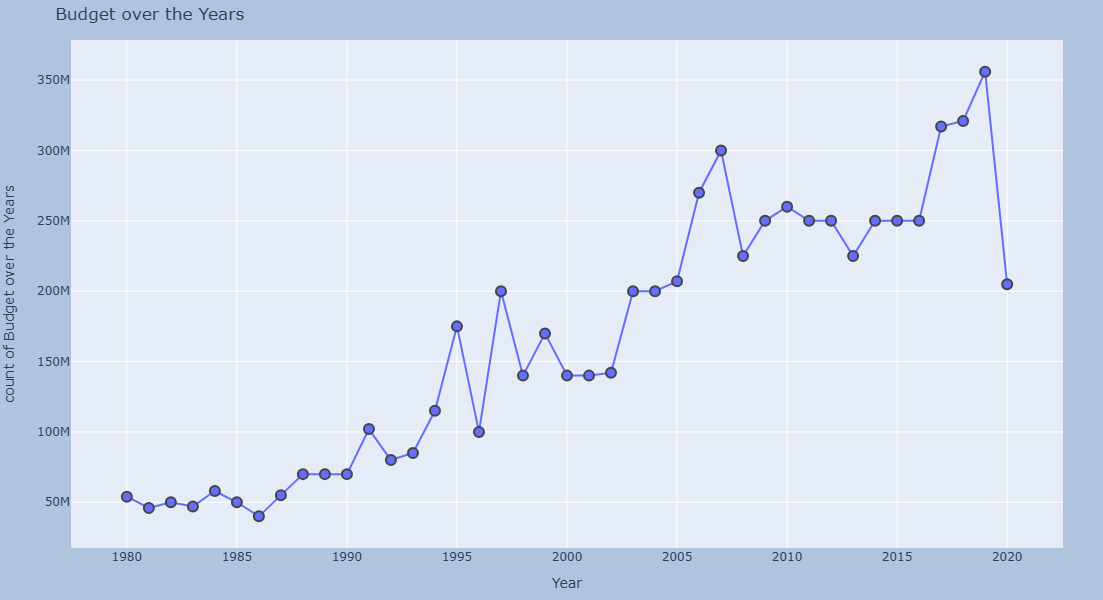

In [51]:
import plotly.express as px
fig = px.line(yearly_most_budgeted, x='year', y='budget', title='Budget over the Years')
fig.update_layout(width=800, height=600,xaxis_title='Year', yaxis_title='count of Budget over the Years')
fig.update_layout(
    margin=dict(l=40, r=40, t=40, b=40),
    paper_bgcolor="LightSteelBlue")
fig.update_traces(mode='lines+markers', marker_line_width=2, marker_size=10)
fig.show()

## Observations:
- There is fluatuations in Budget which increase gradually
- The year with highest Budget is year 2019 with budget of 356millions 

# Key insights
- The highest number of flop occurs in year 1999 with about 77 movies
- Highest profit generated occur in year 1997,2009 and 2019 
- There are just 8 movies produced in year 2020 which explains the sharp drop in the number of budgeted and profited movies across the due to covid
- 79.7% of the movies are produced in the united state,and also appears as country with highest budgeted,highest profited,highest scored and highest voted across the year with significant difference compare with other countries
- Action movies also apear has the genre with highest budgeted,highest profited,highest scored and highest voted across the year
- James Cameron  undoubtedly top writer over the year,also the director with highest budgeted director across the year
- Top  directors over the year are Christopher Nolan,Steven Spielberg,James Cameron,Anthony Russo in the catories(highest budgeted,highest profited,highest scored,highest voted)
- Absence Female Directors and writer is observed
